In [1]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('motorcycle_model_ready_data')

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 27767
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [8]:
cat_features = ['title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'delivery', 'fuel_type', 'color', 'street_legal', 'title_status', 'transmission', 'bike_type']
cat_sub_features = [ 'bobbe', 'cafe ', 'chopp', 'cruis', 'dirtb', 'dual-', 'moped', 'other', 'scoot', 'sport', 'stand', 'stree', 'touri', 'trike', 'black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'white', 'yellow', 'diesel', 'electric', 'gas', 'hybrid', 'other.1']
num_features = ['year', 'price', 'condition', 'mileage', 'engine_size']

In [9]:
len(cat_features)+len(num_features) + len(cat_sub_features)

49

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


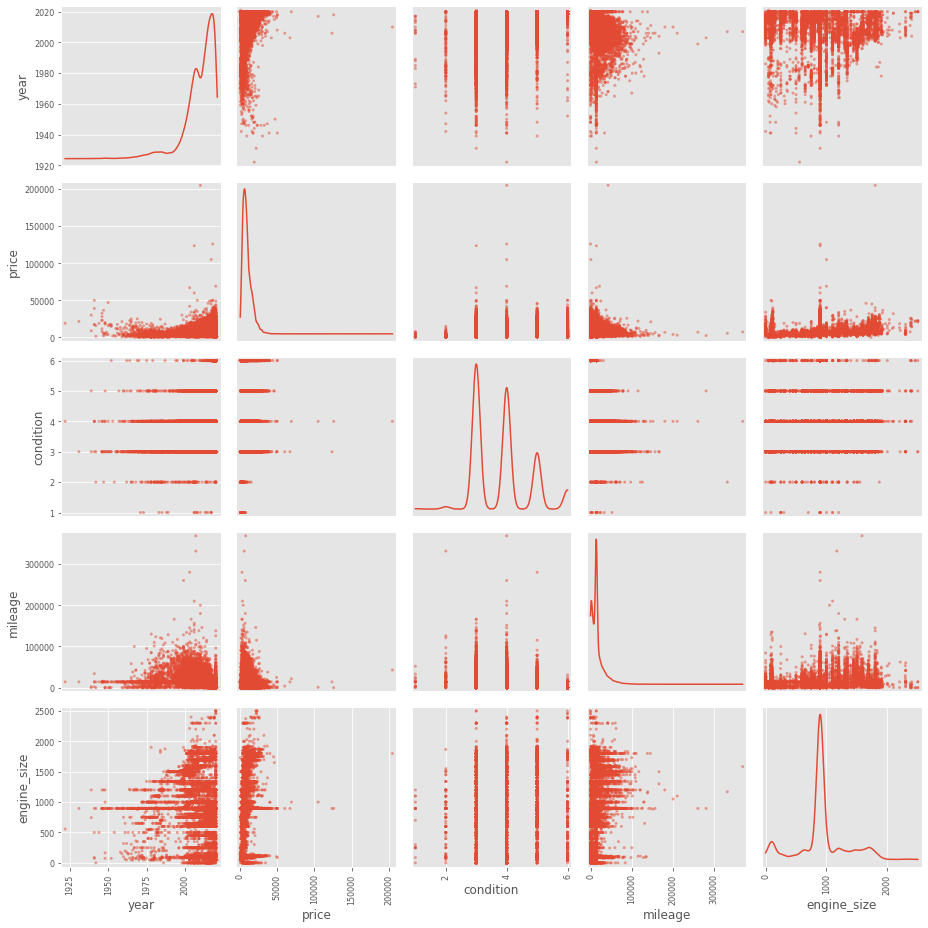

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")
plt.title("Motorcycle Dataframe Scatter Matrix")
ax = pd.plotting.scatter_matrix(df[num_features], ax=ax, diagonal='kde')
plt.tight_layout()
plt.show()

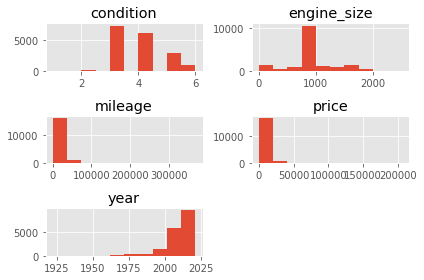

In [11]:

ax = df[num_features].hist(bins=10)
plt.tight_layout()

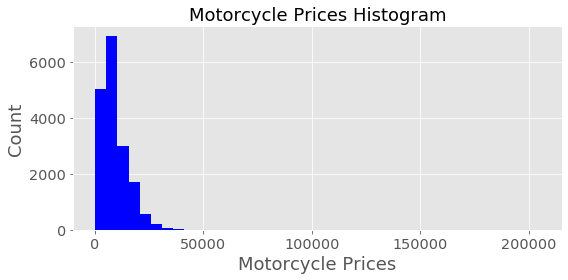

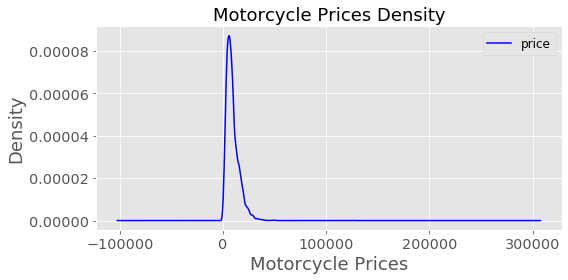

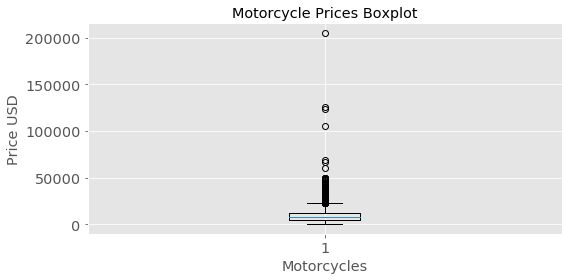

In [18]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Motorcycle years Histogram')

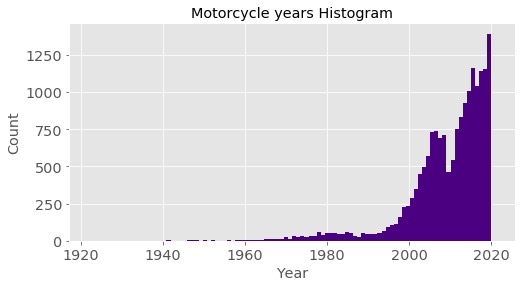

In [19]:
plt.hist(df['year'], 100, color = 'indigo')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Motorcycle years Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

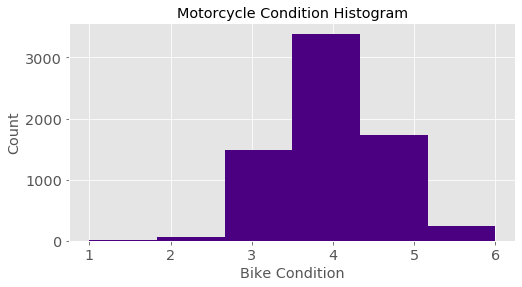

In [102]:
plt.hist(df['condition'], 6, color='indigo')
plt.xlabel('Bike Condition')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

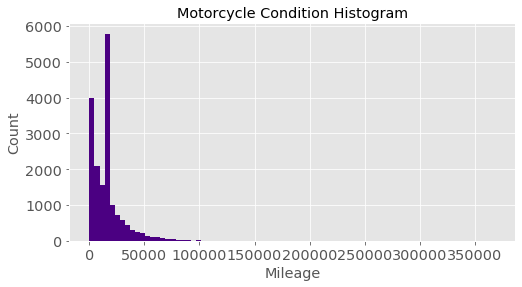

In [21]:
plt.hist(df['mileage'], 80, color= 'indigo')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Bike Type Histogram')

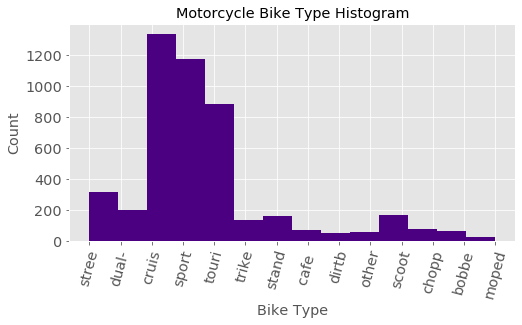

In [104]:
df.dropna(inplace=True)
plt.hist(df['bike_type'], 14, color= 'indigo')
plt.xlabel('Bike Type')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title('Motorcycle Bike Type Histogram')

In [ ]:
plt.hist(df['engine_size'], 15, color = 'indigo')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

In [ ]:
df.info()

In [ ]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [ ]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

In [ ]:
np.sqrt(mean_squared_error(y1_test, y_pred))

In [ ]:
for idx,_ in enumerate(y1_test - y_pred):
    print(y1_test[idx], '\t\t',':',_)

In [ ]:
plt.scatter(y1_test, y_pred)
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [ ]:
for idx, i in enumerate(df['price']):
    if i > 40000:
        df.drop(idx, axis=0, inplace = True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [ ]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [ ]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

In [ ]:
np.sqrt(mean_squared_error(y1_test, y_pred))

In [ ]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [ ]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [23]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

NameError: name 'rf1' is not defined

In [24]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

NameError: name 'y1_test' is not defined

In [25]:
pos_or_neg

[]

In [26]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

NameError: name 'y1_test' is not defined

In [27]:
analysis_df['diff'] = diff

NameError: name 'analysis_df' is not defined

In [28]:
analysis_df['diff_percent'] = diff_percent

NameError: name 'analysis_df' is not defined

In [29]:
analysis_df['pos_or_neg'] = pos_or_neg

NameError: name 'analysis_df' is not defined

In [30]:
analysis_df.info()

NameError: name 'analysis_df' is not defined

In [31]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

NameError: name 'analysis_df' is not defined

In [32]:
analysis_df.info()

NameError: name 'analysis_df' is not defined

In [33]:
adf_idx = analysis_df['diff'].sort_values().index

NameError: name 'analysis_df' is not defined

In [34]:
df.engine_size[1879]

895.5236939583598

In [35]:
analysis_df.loc[adf_idx][-50:]

NameError: name 'analysis_df' is not defined

In [99]:
df = df[df.engine_size != 895.5236939583598]

In [37]:
len(df)

8049

In [38]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [40]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.49935994995004096
Out of Bag Score :  	 0.4619469151423814
Mean Squared Error Score :  3967.3922581523584


In [41]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


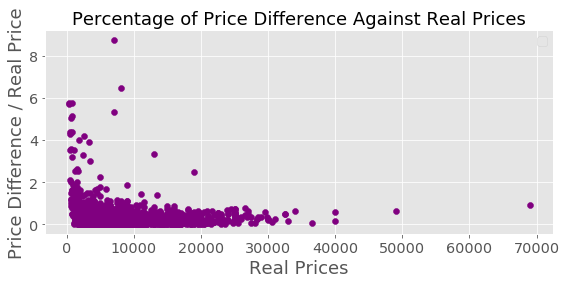

In [42]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


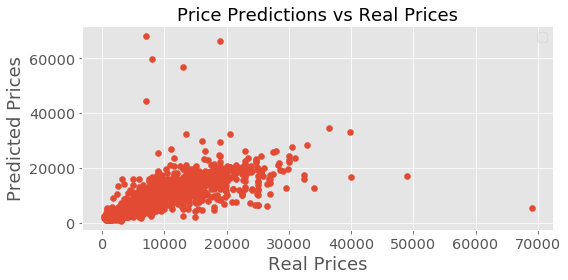

In [43]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

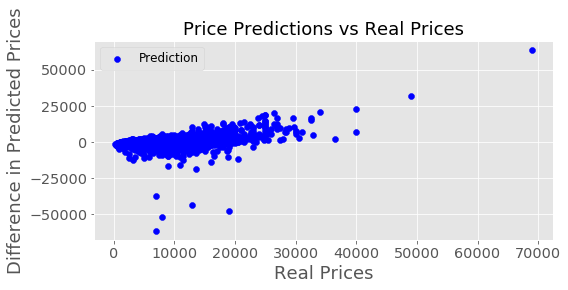

In [44]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

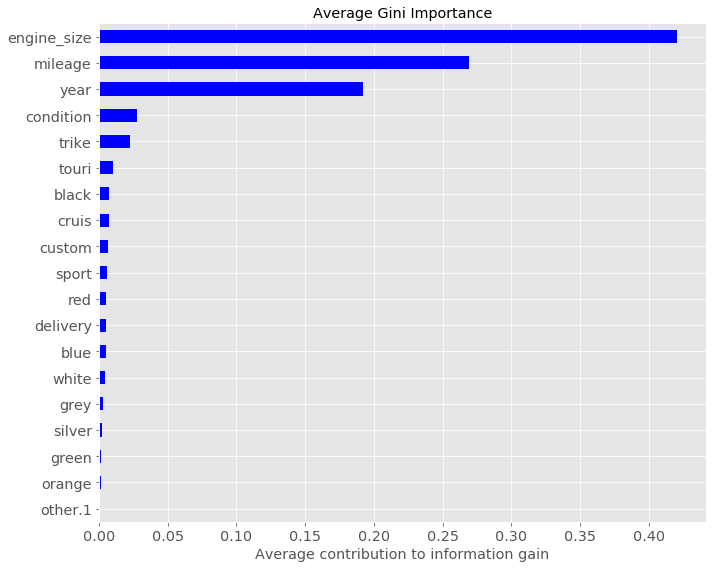

In [45]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [46]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [47]:
pos_or_neg

['short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'sho

In [48]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [49]:
analysis_df['diff'] = diff

In [50]:
analysis_df['diff_percent'] = diff_percent

In [51]:
analysis_df['pos_or_neg'] = pos_or_neg

In [52]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 11944 to 14798
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2657 non-null   object 
 1   year            2657 non-null   float64
 2   price           2657 non-null   float64
 3   neighborhood    2502 non-null   object 
 4   description     2657 non-null   object 
 5   url             2657 non-null   object 
 6   model           2657 non-null   object 
 7   vin             2657 non-null   int64  
 8   condition       2657 non-null   int64  
 9   cryptocurrency  2657 non-null   int64  
 10  delivery        2657 non-null   int64  
 11  engine_size     2657 non-null   float64
 12  fuel_type       2657 non-null   object 
 13  mileage         2657 non-null   float64
 14  color           2657 non-null   object 
 15  street_legal    2657 non-null   int64  
 16  title_status    2657 non-null   object 
 17  transmission    2657 non-nul

In [53]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [54]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 11944 to 14798
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2657 non-null   object 
 1   pos_or_neg      2657 non-null   object 
 2   diff            2657 non-null   float64
 3   diff_percent    2657 non-null   float64
 4   price           2657 non-null   float64
 5   year            2657 non-null   float64
 6   mileage         2657 non-null   float64
 7   engine_size     2657 non-null   float64
 8   condition       2657 non-null   int64  
 9   neighborhood    2502 non-null   object 
 10  description     2657 non-null   object 
 11  url             2657 non-null   object 
 12  model           2657 non-null   object 
 13  vin             2657 non-null   int64  
 14  cryptocurrency  2657 non-null   int64  
 15  delivery        2657 non-null   int64  
 16  fuel_type       2657 non-null   object 
 17  color           2657 non-nul

In [55]:
adf_idx = analysis_df['diff'].sort_values().index

In [56]:
len(analysis_df)

2657

In [57]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
6618,2013 Kawasaki Voyager Trike,over +,10752.965000,0.565946,19000.0,2013.0,34500.000000,1700.0,3,Bradenton,...,0,0,0,1,0,0,0,1,0,0
492,2015 Harley Tri Glide,over +,10762.015000,0.467914,23000.0,2015.0,4477.000000,1688.0,5,Goodyear,...,0,0,0,0,0,0,0,1,0,0
5875,2014 Honda Grom Base,short -,10831.265000,4.167474,2599.0,2014.0,1565.000000,124.0,4,Dania beach,...,0,0,0,0,0,0,0,1,0,0
11883,"2017 Harley Davidson CVO Street Glide 114"" ...",over +,10843.815000,0.404635,26799.0,2017.0,10700.000000,1868.0,3,Wilkins Motorsports,...,0,0,0,0,0,0,0,1,0,0
4576,victory Vegas 8 ball,short -,11100.735000,2.220147,5000.0,2020.0,24000.000000,1632.0,5,NaN,...,0,0,0,0,0,0,0,1,0,0
5619,2016 HARLEY DAVIDSON ROAD GLIDE SPECIAL TOTAL ...,over +,11143.605000,0.412741,26999.0,2016.0,5500.000000,1689.0,5,PORT ORANGE,...,0,0,0,0,0,0,0,1,0,0
5029,2010 Honda CSC,over +,11312.460000,0.452589,24995.0,2010.0,16780.000000,1832.0,5,Clarks,...,0,1,0,0,0,0,0,1,0,0
9111,1999 FXST Custom Harley Davidson,over +,11330.940000,0.708184,16000.0,1999.0,18000.000000,1300.0,4,New Bedford,...,0,0,0,0,0,0,0,1,0,0
9256,2008 custom low magum biginch prostreet,over +,11500.030000,0.479168,24000.0,2008.0,3000.000000,2032.0,5,carleton,...,0,0,0,0,0,0,0,1,0,0
13948,2018 BMW R1200GS Adventure,over +,11506.575000,0.511403,22500.0,2018.0,600.000000,1200.0,5,Hillsboro,...,0,0,0,0,0,0,0,1,0,0


In [58]:
analysis_df['mileage'][1:2]

13797    46243.0
Name: mileage, dtype: float64

In [59]:
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]

In [60]:
len(df)

6903

In [61]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [63]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.6068146145814346
Out of Bag Score :  	 0.4305425728464527
Mean Squared Error Score :  3396.8936802545313


In [64]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


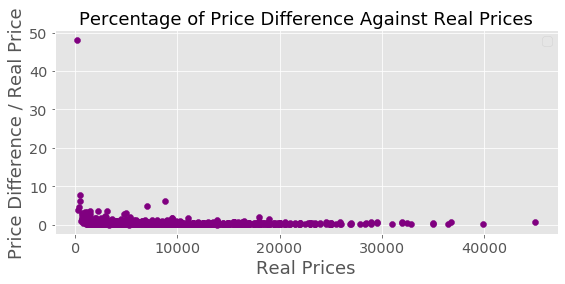

In [65]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


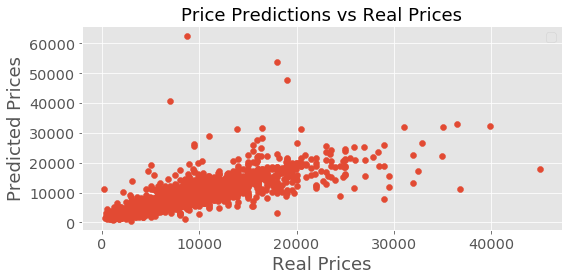

In [66]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

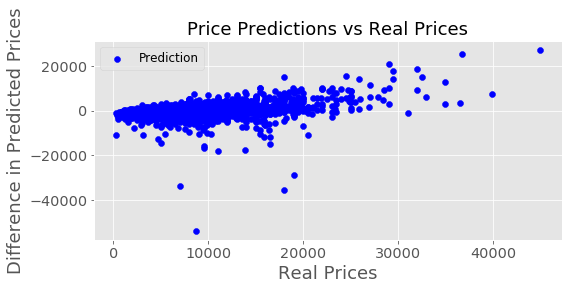

In [67]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

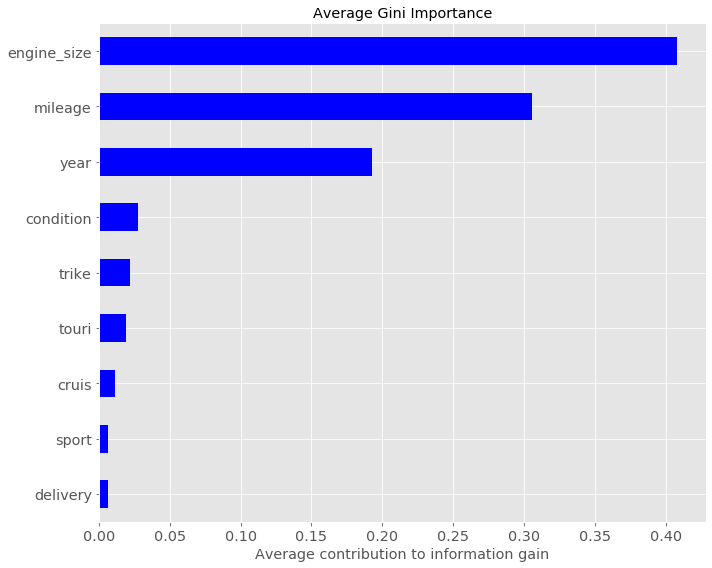

In [68]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [69]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [70]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [71]:
analysis_df['diff'] = diff

In [72]:
analysis_df['diff_percent'] = diff_percent

In [73]:
analysis_df['pos_or_neg'] = pos_or_neg

In [74]:
analysis_df['y_pred'] = y_pred

In [75]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 5004 to 12820
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2278 non-null   object 
 1   year            2278 non-null   float64
 2   price           2278 non-null   float64
 3   neighborhood    2161 non-null   object 
 4   description     2278 non-null   object 
 5   url             2278 non-null   object 
 6   model           2278 non-null   object 
 7   vin             2278 non-null   int64  
 8   condition       2278 non-null   int64  
 9   cryptocurrency  2278 non-null   int64  
 10  delivery        2278 non-null   int64  
 11  engine_size     2278 non-null   float64
 12  fuel_type       2278 non-null   object 
 13  mileage         2278 non-null   float64
 14  color           2278 non-null   object 
 15  street_legal    2278 non-null   int64  
 16  title_status    2278 non-null   object 
 17  transmission    2278 non-null

In [76]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [77]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 5004 to 12820
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2278 non-null   object 
 1   pos_or_neg      2278 non-null   object 
 2   diff            2278 non-null   float64
 3   diff_percent    2278 non-null   float64
 4   price           2278 non-null   float64
 5   y_pred          2278 non-null   float64
 6   year            2278 non-null   float64
 7   mileage         2278 non-null   float64
 8   engine_size     2278 non-null   float64
 9   condition       2278 non-null   int64  
 10  neighborhood    2161 non-null   object 
 11  description     2278 non-null   object 
 12  url             2278 non-null   object 
 13  model           2278 non-null   object 
 14  vin             2278 non-null   int64  
 15  cryptocurrency  2278 non-null   int64  
 16  delivery        2278 non-null   int64  
 17  fuel_type       2278 non-null

In [78]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [79]:
len(analysis_df)

2278

In [80]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,y_pred,year,mileage,engine_size,condition,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
7387,2017 VICTORY GUNNER,over +,9676.106667,1.211330,7988.0,17664.106667,2017.0,2274.0,1900.0,5,...,0,0,0,0,0,0,0,1,0,0
6711,05 Harley Softail,over +,6192.505000,1.238501,5000.0,11192.505000,2020.0,34586.0,1450.0,4,...,0,0,0,0,0,0,0,1,0,0
5152,14 harley ultra. Lots of xtras,over +,17417.395000,1.253050,13900.0,31317.395000,2020.0,38000.0,103.0,4,...,0,0,0,0,0,0,0,1,0,0
16979,1973 Kawasaki G3SS 90cc Vintage Road Bike.,over +,2260.455000,1.255808,1800.0,4060.455000,1973.0,3585.0,90.0,4,...,0,0,0,0,0,0,0,1,0,0
3405,JPM - 2019 Rival Motorsports CA MudHawk 6 - 110cc,over +,1262.555000,1.268899,995.0,2257.555000,2019.0,1.0,110.0,6,...,0,0,0,0,0,0,0,1,0,0
8371,2002 BMW R1150RT Price reduced AGAIN,over +,3854.598333,1.287011,2995.0,6849.598333,2002.0,60.0,1150.0,4,...,0,0,1,0,0,0,0,1,0,0
5555,1992 Honda Goldwing Motorcycle 1500cc,over +,2725.185000,1.362593,2000.0,4725.185000,1992.0,8809.0,1500.0,2,...,0,0,0,0,0,0,0,1,0,0
9035,1999 Suzuki Intruder,over +,4100.980000,1.366993,3000.0,7100.980000,1999.0,5000.0,1500.0,4,...,0,0,0,0,0,0,0,1,0,0
17270,03 zrx1200r,over +,5064.860000,1.406906,3600.0,8664.860000,2020.0,40000.0,1200.0,4,...,0,0,0,0,0,0,0,1,0,0
16125,2015 Triumph Motorcycle 1000cc,over +,7114.840000,1.422968,5000.0,12114.840000,2015.0,7444.0,1000.0,5,...,0,0,0,0,0,0,0,1,0,0


In [81]:
df.drop([10359, 3644, 15600], inplace=True)

KeyError: '[10359] not found in axis'

In [82]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [84]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.5851089586861794
Out of Bag Score :  	 0.4382207249145129
Mean Squared Error Score :  3489.3963243221015


In [85]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(100*abs(diff_/_))

No handles with labels found to put in legend.


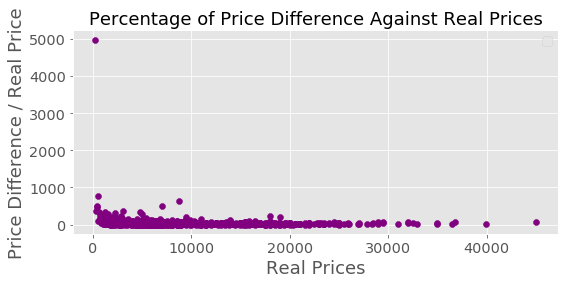

In [86]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


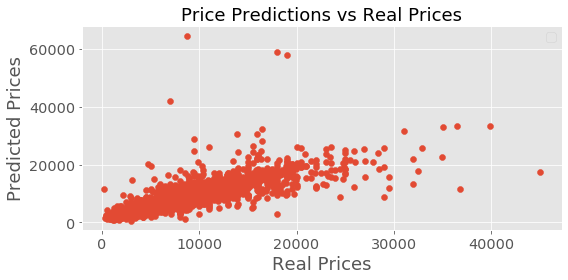

In [87]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


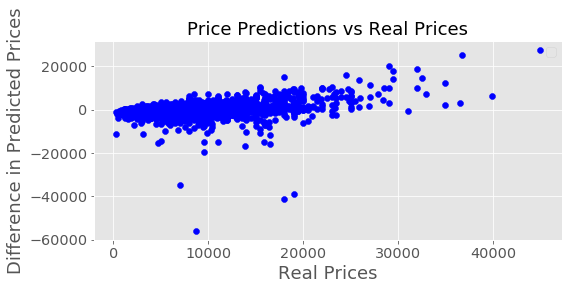

In [88]:
plt.scatter(y1_test, diff, color='b')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

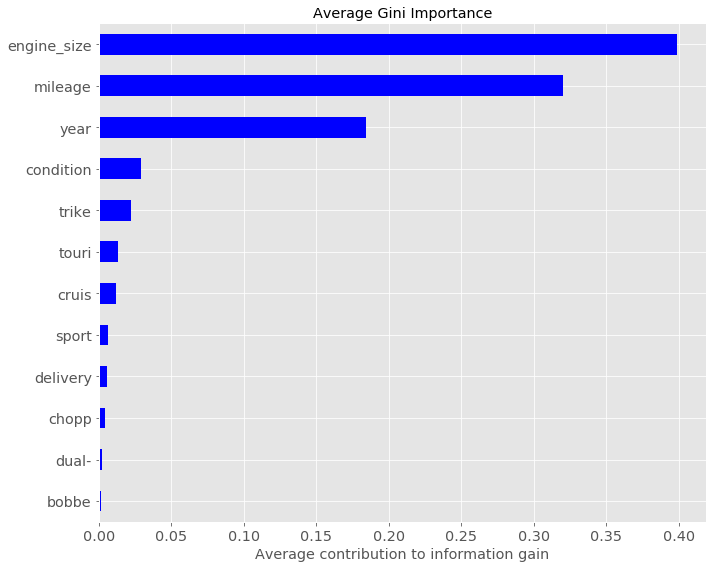

In [89]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [90]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [91]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [92]:
analysis_df['diff'] = diff

In [93]:
analysis_df['diff_percent'] = diff_percent

In [94]:
analysis_df['pos_or_neg'] = pos_or_neg

In [95]:
analysis_df['y_pred'] = y_pred

In [96]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 5004 to 12820
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2278 non-null   object 
 1   year            2278 non-null   float64
 2   price           2278 non-null   float64
 3   neighborhood    2161 non-null   object 
 4   description     2278 non-null   object 
 5   url             2278 non-null   object 
 6   model           2278 non-null   object 
 7   vin             2278 non-null   int64  
 8   condition       2278 non-null   int64  
 9   cryptocurrency  2278 non-null   int64  
 10  delivery        2278 non-null   int64  
 11  engine_size     2278 non-null   float64
 12  fuel_type       2278 non-null   object 
 13  mileage         2278 non-null   float64
 14  color           2278 non-null   object 
 15  street_legal    2278 non-null   int64  
 16  title_status    2278 non-null   object 
 17  transmission    2278 non-null

In [97]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [98]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 5004 to 12820
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2278 non-null   object 
 1   pos_or_neg      2278 non-null   object 
 2   diff            2278 non-null   float64
 3   diff_percent    2278 non-null   float64
 4   price           2278 non-null   float64
 5   y_pred          2278 non-null   float64
 6   year            2278 non-null   float64
 7   mileage         2278 non-null   float64
 8   engine_size     2278 non-null   float64
 9   condition       2278 non-null   int64  
 10  neighborhood    2161 non-null   object 
 11  description     2278 non-null   object 
 12  url             2278 non-null   object 
 13  model           2278 non-null   object 
 14  vin             2278 non-null   int64  
 15  cryptocurrency  2278 non-null   int64  
 16  delivery        2278 non-null   int64  
 17  fuel_type       2278 non-null

In [ ]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [ ]:
analysis_df.loc[adf_idx][-50:]

In [ ]:
X = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X_test, y_test))
print('RMSE \t\t: ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

In [ ]:
feat_scores = pd.Series(model.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

Text(0.5, 1.0, 'Motorcycle Engine Size Histogram')

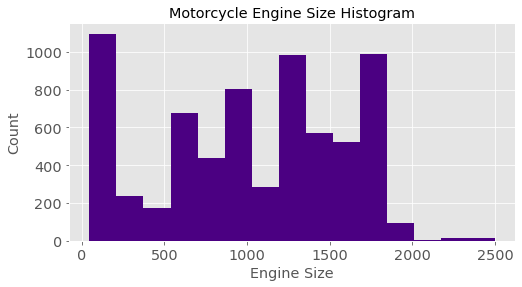

In [101]:
plt.hist(df['engine_size'], 15, color = 'indigo')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Motorcycle Engine Size Histogram')

In [ ]:
# condition = df['condition'].unique()
# for con in condition:
#     plt.plot(df.loc[df.condition==con,'year'], 
#              df.loc[df.condition==con,'price'], 
#              linestyle='',
#              marker='o',
#              alpha=.1,
#              label="condition="+str(con))
# plt.xlabel('year')
# plt.ylabel('price')
# plt.legend(numpoints=1)

In [ ]:
num_vars = ['price', 'engine_size', 'mileage', 'co']

In [ ]:
X = df.drop(['condition', 'moped', 'cafe ', 'stand', 'dirtb', 'stree', 'dual-', 'other', 'scoot', 'bobbe',
             'chopp', 'sport', 'delivery', 'cruis', 'trike', 'touri',  
             'price', 'title', 'neighborhood', 'description', 'url', 'model', 
             'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 
             'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 
             'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 
             'white', 'blue', 'custom', 'black', 'red'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X_test, y_test))
print('MSE : ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

In [ ]:
feat_scores = pd.Series(model.feature_importances_,
                           index=df.drop(['condition', 'moped', 'cafe ', 'stand', 'dirtb', 'stree', 'dual-', 'other', 'scoot', 'bobbe',
             'chopp', 'sport', 'delivery', 'cruis', 'trike', 'touri',  
             'price', 'title', 'neighborhood', 'description', 'url', 'model', 
             'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 
             'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 
             'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 
             'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()